In [ ]:
#QUESTION 1

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load your dataset
df = pd.read_csv("/content/marketing_campaign_dataset (1).csv")

# Perform ANOVA to compare sales across different channels
# The formula 'sales ~ C(channel)' specifies a model where sales is the dependent variable and 'channel' is the independent variable treated as a categorical factor.
anova_model = ols('sales ~ C(channel)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print("ANOVA Table:")
print(anova_table)

# Average sales per channel
avg_sales_per_channel = df.groupby('channel')['sales'].mean().sort_values(ascending=False)
print("Average sales per channel:")
print(avg_sales_per_channel)

# Total sales per channel
total_sales_per_channel = df.groupby('channel')['sales'].sum().sort_values(ascending=False)
print("\nTotal sales per channel:")
print(total_sales_per_channel)

print("ANOVA tells us that there's is statistically significant difference in the means of Email, SMS and Social Media.")
print("Based on results of ANOVA, we compare the mean sales through each channel. This indicates that Social Media has the highest performance in Sales among chanels.")

ANOVA Table:
                  sum_sq      df           F         PR(>F)
C(channel)  1.387097e+08     2.0  449.843944  1.033532e-153
Residual    2.308005e+08  1497.0         NaN            NaN
Average sales per channel:
channel
Social Media    2510.079635
Email           1982.010739
SMS             1783.564473
Name: sales, dtype: float64

Total sales per channel:
channel
Social Media    1.234959e+06
Email           1.030646e+06
SMS             8.703795e+05
Name: sales, dtype: float64
ANOVA tells us that there's is statistically significant difference in the means of Email, SMS and Social Media.
Based on results of ANOVA, we compare the mean sales through each channel. This indicates that Social Media has the highest performance in Sales among chanels.


In [ ]:
# ---QUESTION 2---

import pandas as pd
from scipy import stats

# Load your dataset
df = pd.read_csv("/content/marketing_campaign_dataset (1).csv")

# Separate engagement scores by gender
male_scores = df[df['gender'] == 'Male']['engagement_score'].dropna()
female_scores = df[df['gender'] == 'Female']['engagement_score'].dropna()

# --- Assumption 1: Normality (Shapiro-Wilk test) ---
shapiro_m = stats.shapiro(male_scores)
shapiro_f = stats.shapiro(female_scores)

print(f"Shapiro Male: W={shapiro_m[0]:.4f}, p={shapiro_m[1]:.4f}")
print(f"Shapiro Female: W={shapiro_f[0]:.4f}, p={shapiro_f[1]:.4f}")

# --- Assumption 2: Equal variances (Levene’s test) ---
levene_test = stats.levene(male_scores, female_scores)
print(f"Levene’s test: stat={levene_test[0]:.4f}, p={levene_test[1]:.4f}")

# --- Choosing the right test ---
if shapiro_m[1] > 0.05 and shapiro_f[1] > 0.05:
    # Normality OK
    if levene_test[1] > 0.05:
        # Equal variances → Independent t-test
        test = stats.ttest_ind(male_scores, female_scores, equal_var=True)
        test_type = "Independent t-test (equal variances)"
    else:
        # Unequal variances → Welch’s t-test
        test = stats.ttest_ind(male_scores, female_scores, equal_var=False)
        test_type = "Welch’s t-test (unequal variances)"

print(f"\n{test_type}: stat={test[0]:.4f}, p={test[1]:.4f}")

# --- Interpretation ---
if test[1] < 0.05:
    print("There is a statistically significant difference in engagement between male and female customers.")
else:
    print("No statistically significant difference in engagement between male and female customers.")


Shapiro Male: W=0.9971, p=0.1802
Shapiro Female: W=0.9988, p=0.9061
Levene’s test: stat=0.0202, p=0.8870

Independent t-test (equal variances): stat=0.4509, p=0.6521
No statistically significant difference in engagement between male and female customers.


In [ ]:
# ---QUESTION 3---

# Steps implemented (in order):
# 1. check for linearity with scatter plots
# 2. check for normality (Shapiro-Wilk) of key variables
# 3. check homogeneity of variance across groups (Levene's test)
# 4. check group differences with ANOVA (what you called "marriage")
# 5. fit multiple linear regressions (4 model variants)
# 6. check if residuals are normally distributed (mean ~ 0, std = sigma) with Shapiro-Wilk and plots
# 7. test homogeneity of residual variance (Breusch-Pagan)
# 8. scatter plot of predictions vs errors
# 9. compare goodness-of-fit (R-squared, adj R-squared, AIC/BIC)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.gofplots import qqplot

from sklearn.metrics import mean_squared_error

In [ ]:
#QUESTION 3

# -----------------------------
# Load data
# -----------------------------
df = pd.read_csv("/content/marketing_campaign_dataset (1).csv")
df.head(5)

print(len(df))

# Inspect missing values
print("\nMissing values per column:")
print(df.isna().sum())


# Ensure categorical columns are typed as category
for c in ['channel', 'gender']:
    if c in df.columns:
        df[c] = df[c].astype('category')


1500

Missing values per column:
channel             0
sales               0
gender              0
CTR                 0
ad_budget           0
engagement_score    0
dtype: int64


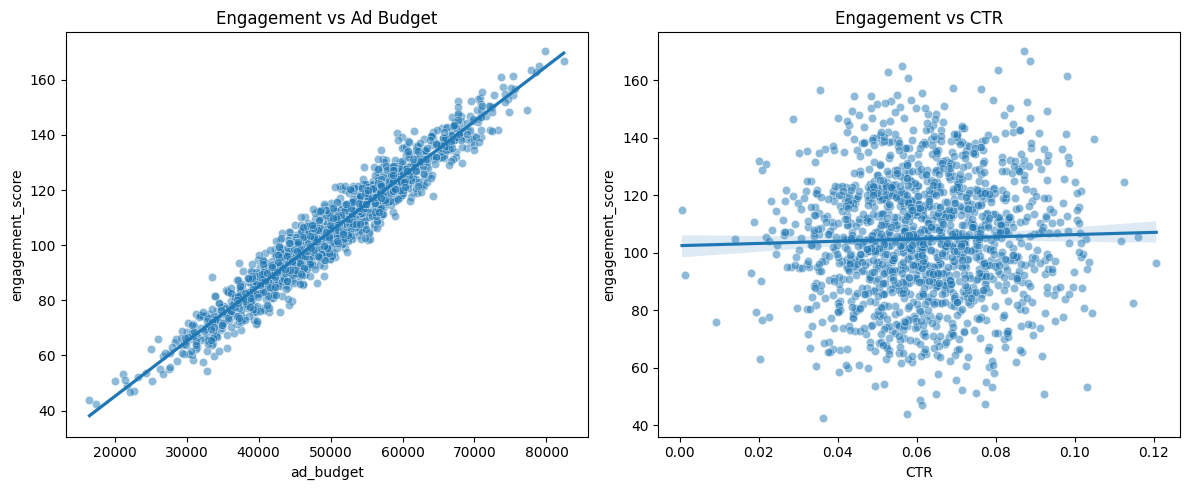

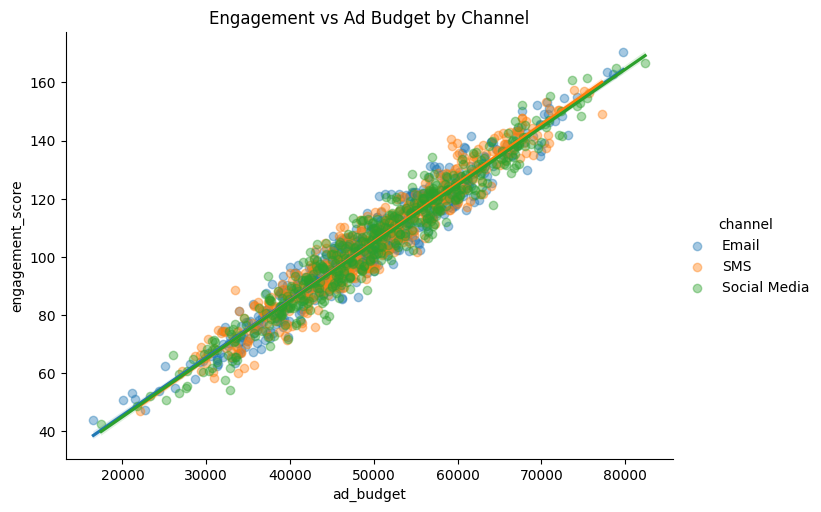

In [ ]:

# -----------------------------
# 1) Check linearity with scatter plots
#    - engagement_score vs ad_budget
#    - engagement_score vs ctr
#    We also add a fitted regression line to visually inspect linearity.
# -----------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='ad_budget', y='engagement_score', alpha=0.5)
sns.regplot(data=df, x='ad_budget', y='engagement_score', scatter=False, lowess=False)
plt.title('Engagement vs Ad Budget')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='CTR', y='engagement_score', alpha=0.5)
sns.regplot(data=df, x='CTR', y='engagement_score', scatter=False, lowess=False)
plt.title('Engagement vs CTR')

plt.tight_layout()
plt.show()

#scatterplot colored by channel (to detect interactions / different slopes)
sns.lmplot(data=df, x='ad_budget', y='engagement_score', hue='channel', lowess=False, height=5, aspect=1.4, scatter_kws={'alpha':0.4})
plt.title('Engagement vs Ad Budget by Channel')
plt.show()


engagement_score: W-stat=0.9988, p-value=0.3894
 engagement_score looks normally distributed.

ad_budget: W-stat=0.9990, p-value=0.6234
 ad_budget looks normally distributed.

CTR: W-stat=0.9987, p-value=0.3065
 CTR looks normally distributed.



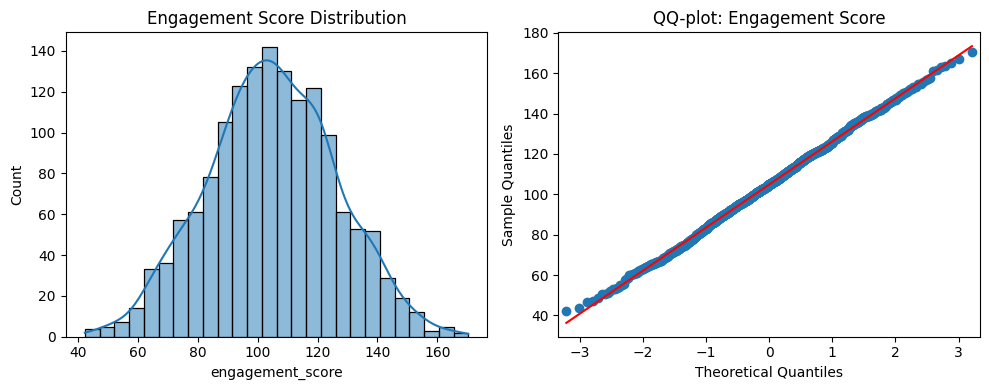

In [ ]:
# -----------------------------
# 2) Check for normality by Shapiro-Wilk test
#    We'll test:
#      - engagement_score (dependent variable)
#      - ad_budget and ctr (predictors)
#    Notes:
#      - Shapiro-Wilk is sensitive to very large samples (n>5000). For big n, consider stats.normaltest or QQ-plot.
# -----------------------------
from scipy import stats

def shapiro_report(series, name):
    stat, p = stats.shapiro(series)
    print(f"{name}: W-stat={stat:.4f}, p-value={p:.4f}")
    if p > 0.05:
        print(f" {name} looks normally distributed.\n")
    else:
        print(f" {name} is NOT normally distributed.\n")

shapiro_report(df['engagement_score'], 'engagement_score')
shapiro_report(df['ad_budget'], 'ad_budget')
shapiro_report(df['CTR'], 'CTR')

# Visual check for engagement_score distribution
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['engagement_score'], kde=True)
plt.title('Engagement Score Distribution')

plt.subplot(1,2,2)
qqplot(df['engagement_score'], line='s', ax=plt.gca())
plt.title('QQ-plot: Engagement Score')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3435803078.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['engagement_score'].values for _, group in df.groupby('channel')]
/tmp/ipython-input-3435803078.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['engagement_score'].values for _, group in df.groupby('gender')]


Levene's test across channel: stat=0.3566, p=7.0011e-01 --> equal variances (fail to reject H0)
Levene's test across gender: stat=0.0202, p=8.8703e-01 --> equal variances (fail to reject H0)


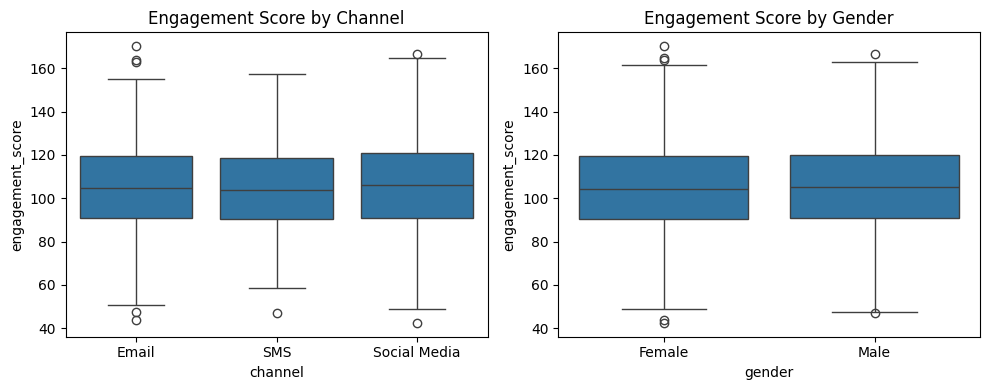

In [ ]:
# -----------------------------
# 3) Check for homogeneity of variance - Levene's test
#    We'll test whether engagement_score variance is equal across channel and across gender.
# -----------------------------
if 'channel' in df.columns:
    groups = [group['engagement_score'].values for _, group in df.groupby('channel')]
    stat, p = stats.levene(*groups)
    print(f"Levene's test across channel: stat={stat:.4f}, p={p:.4e} --> {'equal variances (fail to reject H0)' if p>0.05 else 'unequal variances (reject H0)'}")

if 'gender' in df.columns:
    groups = [group['engagement_score'].values for _, group in df.groupby('gender')]
    stat, p = stats.levene(*groups)
    print(f"Levene's test across gender: stat={stat:.4f}, p={p:.4e} --> {'equal variances (fail to reject H0)' if p>0.05 else 'unequal variances (reject H0)'}")


In [ ]:
# -----------------------------
# 4) Check for "marriage" with ANOVA
#    I interpret this as checking whether engagement_score differs across categorical groups (channel, gender) using ANOVA.
#    We'll run one-way ANOVAs and show the table.
# -----------------------------
if 'channel' in df.columns:
    model_channel = ols('engagement_score ~ C(channel)', data=df).fit()
    anova_channel = sm.stats.anova_lm(model_channel, typ=2)
    print("\nANOVA: engagement_score ~ channel")
    print(anova_channel)

if 'gender' in df.columns:
    model_gender = ols('engagement_score ~ C(gender)', data=df).fit()
    anova_gender = sm.stats.anova_lm(model_gender, typ=2)
    print("\nANOVA: engagement_score ~ gender")
    print(anova_gender)




ANOVA: engagement_score ~ channel
                   sum_sq      df         F    PR(>F)
C(channel)     269.521471     2.0  0.294784  0.744735
Residual    684353.984965  1497.0       NaN       NaN

ANOVA: engagement_score ~ gender
                  sum_sq      df         F    PR(>F)
C(gender)      92.924119     1.0  0.203352  0.652094
Residual   684530.582318  1498.0       NaN       NaN


In [ ]:
# -----------------------------
# Build formulas (use column names in lowercase)
# -----------------------------
# 5) Fit linear regression models (simplified manual version)
# -----------------------------

# Make sure categorical vars are treated as such
df['channel'] = df['channel'].astype('category')
df['gender'] = df['gender'].astype('category')

# Define the four formulas manually
formulas = {
    'all_vars': 'engagement_score ~ ad_budget + CTR + sales + C(channel) + C(gender)',

    'no_ad_budget': 'engagement_score ~ CTR + sales + C(channel) + C(gender)',

    'no_ctr': 'engagement_score ~ ad_budget + sales + C(channel) + C(gender)',

    'no_ad_no_ctr': 'engagement_score ~ sales + C(channel) + C(gender)'
}

print("\nFormulas that will be fitted:\n")
for name, formula in formulas.items():
    print(f"{name}: {formula}\n")


# Fit and store results
results = {}
for name, formula in formulas.items():
    model = ols(formula, data=df).fit()
    results[name] = model
    print("\n" + "="*80)
    print(f"MODEL: {name}")
    print(model.summary())



Formulas that will be fitted:

all_vars: engagement_score ~ ad_budget + CTR + sales + C(channel) + C(gender)

no_ad_budget: engagement_score ~ CTR + sales + C(channel) + C(gender)

no_ctr: engagement_score ~ ad_budget + sales + C(channel) + C(gender)

no_ad_no_ctr: engagement_score ~ sales + C(channel) + C(gender)


MODEL: all_vars
                            OLS Regression Results                            
Dep. Variable:       engagement_score   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     4004.
Date:                Mon, 11 Aug 2025   Prob (F-statistic):               0.00
Time:                        11:48:10   Log-Likelihood:                -4592.1
No. Observations:                1500   AIC:                             9198.
Df Residuals:                    1493   BIC:                             9235.
Df Model:                        


Residual diagnostics for model: all_vars
Residuals: mean = -0.000000, std = 5.169480, n = 1500
residuals (all_vars): W-stat=0.9994, p-value=0.9364
 residuals (all_vars) looks normally distributed.



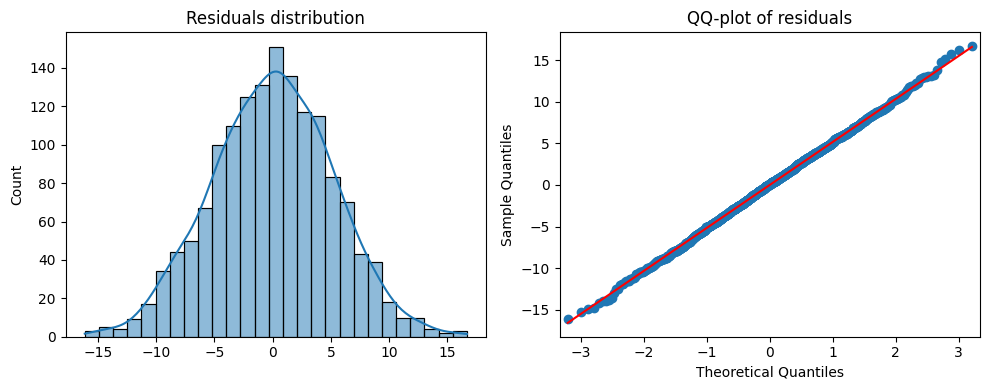

In [ ]:
# -----------------------------
# 6) Check residuals normality, mean 0 and std = sigma for the preferred model
#    We will pick the 'all_vars' model for diagnostic by default (if it exists).
# -----------------------------
normality_test = 'all_vars' if 'all_vars' in results else list(results.keys())[0]
model = results[normality_test]
resid = model.resid
fitted = model.fittedvalues

print(f"\nResidual diagnostics for model: {normality_test}")
print(f"Residuals: mean = {np.mean(resid):.6f}, std = {np.std(resid, ddof=1):.6f}, n = {len(resid)}")
# Shapiro on residuals (again: sample to 5000 if large)
shapiro_report(pd.Series(resid), f"residuals ({normality_test})")

# Histogram & QQ-plot for residuals
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(resid, kde=True)
plt.title('Residuals distribution')

plt.subplot(1,2,2)
qqplot(resid, line='s', ax=plt.gca())
plt.title('QQ-plot of residuals')
plt.tight_layout()
plt.show()


Breusch-Pagan test for heteroscedasticity (H0: homoscedasticity):
  Lagrange multiplier stat: 1.48903
  p-value: 0.96022
  f-value: 0.247259
  f p-value: 0.960498


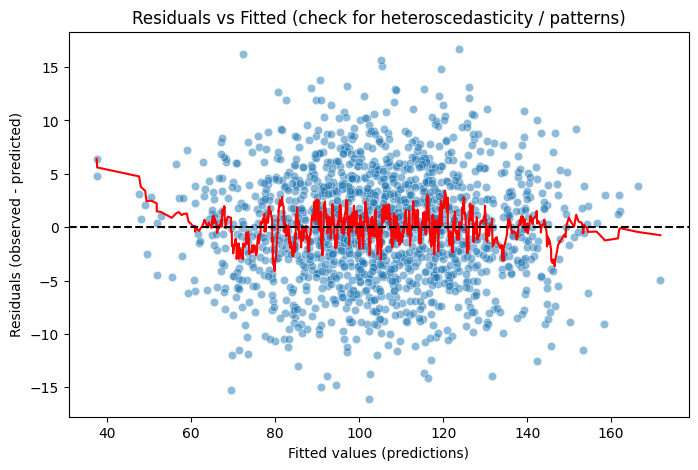

In [ ]:
# -----------------------------
# 7) Check homogeneity of residual variance (heteroscedasticity)
#    We'll use the Breusch-Pagan test: H0 = homoscedasticity (constant variance).
# -----------------------------
# Need the design matrix/exog and residuals
exog = model.model.exog
bp_test = het_breuschpagan(model.resid, exog)
bp_names = ['Lagrange multiplier stat', 'p-value', 'f-value', 'f p-value']
print("\nBreusch-Pagan test for heteroscedasticity (H0: homoscedasticity):")
for name, val in zip(bp_names, bp_test):
    print(f"  {name}: {val:.6g}")

# Visual check: Residuals vs Fitted
plt.figure(figsize=(8,5))
sns.scatterplot(x=fitted, y=resid, alpha=0.5)
sns.lineplot(x=np.sort(fitted), y=pd.Series(resid).iloc[np.argsort(fitted)].rolling(15, min_periods=1).mean(), color='red')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fitted values (predictions)')
plt.ylabel('Residuals (observed - predicted)')
plt.title('Residuals vs Fitted (check for heteroscedasticity / patterns)')
plt.show()

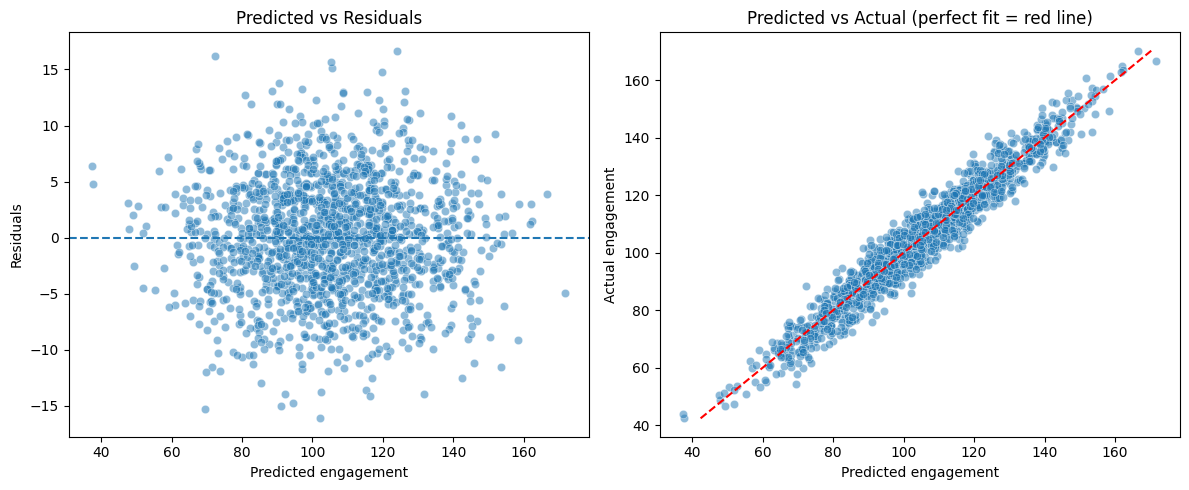

In [ ]:
# -----------------------------
# 8) Scatter plot of prediction vs error (predicted vs residuals) and predicted vs actual
# -----------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=fitted, y=resid, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel('Predicted engagement')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')

plt.subplot(1,2,2)
sns.scatterplot(x=fitted, y=df['engagement_score'], alpha=0.5)
plt.plot([df['engagement_score'].min(), df['engagement_score'].max()],
         [df['engagement_score'].min(), df['engagement_score'].max()], color='red', linestyle='--')
plt.xlabel('Predicted engagement')
plt.ylabel('Actual engagement')
plt.title('Predicted vs Actual (perfect fit = red line)')
plt.tight_layout()
plt.show()

In [ ]:
# -----------------------------
# 9) Goodness-of-fit comparison across the 4 models
#    Print R-squared, adj R-squared, AIC, BIC, RMSE for each model to compare.
# -----------------------------
comparison = []
for name, mod in results.items():
    preds = mod.fittedvalues
    rmse = np.sqrt(mean_squared_error(df['engagement_score'], preds))
    comparison.append({
        'model': name,
        'r_squared': mod.rsquared,
        'adj_r_squared': mod.rsquared_adj,
        'aic': mod.aic,
        'bic': mod.bic,
        'rmse': rmse
    })

cmp_df = pd.DataFrame(comparison).sort_values(by='adj_r_squared', ascending=False).reset_index(drop=True)
print("\nModel comparison (sorted by adjusted R-squared):")
print(cmp_df)

# Optional: show coefficients table for the preferred model
print(f"\nCoefficients for preferred model ({normality_test}):")
coef_table = pd.DataFrame({
    'coef': model.params,
    'std_err': model.bse,
    't': model.tvalues,
    'pvalue': model.pvalues,
    'conf_low': model.conf_int().loc[:,0],
    'conf_high': model.conf_int().loc[:,1]
})
print(coef_table)



Model comparison (sorted by adjusted R-squared):
          model  r_squared  adj_r_squared           aic           bic  \
0      all_vars   0.941488       0.941253   9198.131527   9235.324070   
1        no_ctr   0.937717       0.937508   9289.828737   9321.708059   
2  no_ad_budget   0.001709      -0.001632  13451.355788  13483.235110   
3  no_ad_no_ctr   0.000636      -0.002038  13450.967276  13477.533378   

        rmse  
0   5.167756  
1   5.331705  
2  21.345623  
3  21.357093  

Coefficients for preferred model (all_vars):
                                 coef   std_err           t        pvalue  \
Intercept                   -0.292217  1.100095   -0.265629  7.905617e-01   
C(channel)[T.SMS]            0.144350  0.333629    0.432667  6.653193e-01   
C(channel)[T.Social Media]  -0.462663  0.372457   -1.242190  2.143615e-01   
C(gender)[T.Male]            0.113896  0.269875    0.422034  6.730610e-01   
ad_budget                    0.002001  0.000013  154.853506  0.000000e+00   
C